This notebook uses K-means clustering to derive a color palette from an image.

K-means clustering is an unsupervised learning technique that groups individual data points by identifying centroids such that each individual data point is assigned a cluster based on which centroid is closest to it in n-dimensional space. The goal of K-means clustering is to find the set of *K* centroids such that the difference between individual data points within a cluster is minimized. The cluster centroids therefore serve as the "prototype" of the cluster.

To illustrate this principle, we will apply K-means clustering to pixel data from an image. Every pixel will be treated as an individual data point with RGB data. By applying K-means clustering on the RGB values of image pixels, the algorithm will determine the cluster centroids which are representative of an image cluster, giving us the color palette of an image.

The code to implement K-means clustering using scikit-learn follows.

In [ ]:
%matplotlib inline
# Import libraries

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from imageio import imread

from skimage.transform import resize

from sklearn.cluster import KMeans

from matplotlib.colors import to_hex

To avoid getting different color palettes from different K-means cluster seeds, the random seed is fixed.

In [ ]:
# Fix random seed
np.random.seed(0)

Read the image file as 2-D array of RGB values.

<ipython-input-3-b6dc1da61ac7>:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imread(filepath)


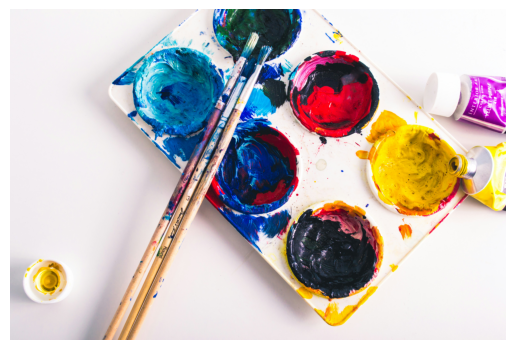

In [ ]:
# Read image file as 2-D array of RGB values
filepath = 'https://images.unsplash.com/photo-1522410818928-5522dacd5066'

img = imread(filepath)

# Show image
plt.axis('off')
plt.imshow(img);

Resize the image to a 200 by 200 pixel image.

In [ ]:
img = resize(img, (200, 200))

Get each pixel as an array of RGB values.

In [ ]:
data = pd.DataFrame(img.reshape(-1, 3),
                    columns=['R', 'G', 'B'])

Cluster the pixels into 5 colors based on the RGB value.

In [ ]:
kmeans = KMeans(n_clusters=64,
                random_state=0)

In [ ]:
# Fit and assign clusters
data['Cluster'] = kmeans.fit_predict(data)

Get the color palette from the cluster centers.

In [ ]:
palette = kmeans.cluster_centers_

In [ ]:
# Convert data to format accepted by imshow
palette_list = list()
for color in palette:
    palette_list.append([[tuple(color)]])

Show the color palette, along with the hexadecimal code for the color.

#fcd706


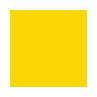

#e1d7db


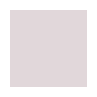

#093f6a


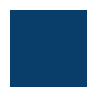

#99364d


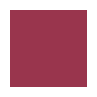

#f6f1f2


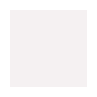

#ee86ab


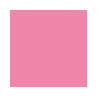

#4d1623


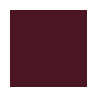

#0eace2


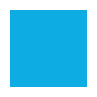

#d49903


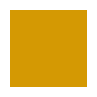

#0944b0


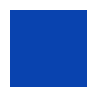

#69738b


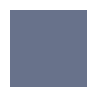

#e3b48a


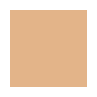

#cabcbf


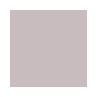

#f9e281


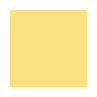

#b111af


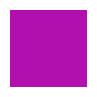

#f40423


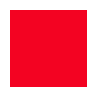

#94adcc


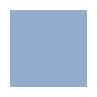

#98725e


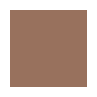

#cd0826


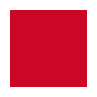

#393b4c


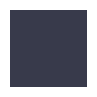

#f8e5be


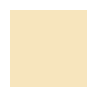

#e966ef


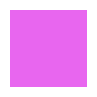

#750d21


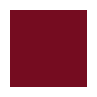

#b98757


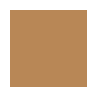

#ab999b


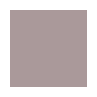

#eae1e3


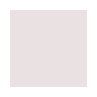

#b37d03


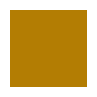

#f5b805


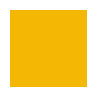

#fafafa


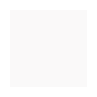

#232d34


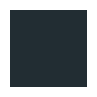

#4abcdd


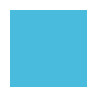

#7e5666


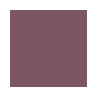

#045289


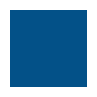

#e232e8


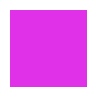

#0988bc


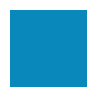

#e8aa56


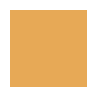

#88d3e9


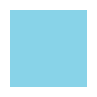

#cd9a75


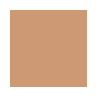

#f1ebec


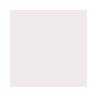

#bad5e6


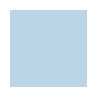

#092451


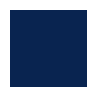

#eac8aa


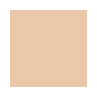

#d74d81


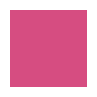

#9c8384


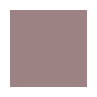

#9d0823


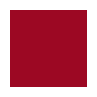

#4d5365


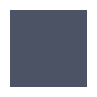

#d9cbcd


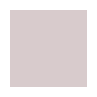

#86580e


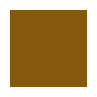

#3c82bf


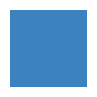

#356194


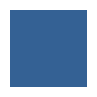

#191f26


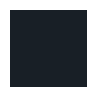

#f0a3ef


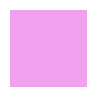

#046aa2


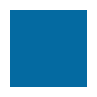

#df2b4c


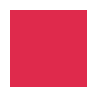

#beacad


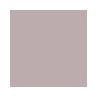

#c85215


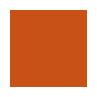

#062f84


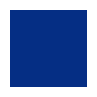

#7f117a


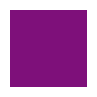

#7194b9


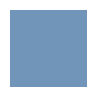

#1b4b42


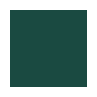

#fada3e


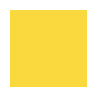

#f2880e


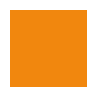

#f7ebda


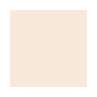

#663742


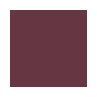

In [ ]:
# Show color palette
for color in palette_list:
    print(to_hex(color[0][0]))
    plt.figure(figsize=(1, 1))
    plt.axis('off')
    plt.imshow(color);
    plt.show();

Recreate the image with using only colors from color palette.

In [ ]:
# Replace every pixel's color with the color of its cluster centroid
data['R_cluster'] = data['Cluster'].apply(lambda x: palette_list[x][0][0][0])
data['G_cluster'] = data['Cluster'].apply(lambda x: palette_list[x][0][0][1])
data['B_cluster'] = data['Cluster'].apply(lambda x: palette_list[x][0][0][2])

In [ ]:
# Convert the dataframe back to a numpy array
img_c = data[['R_cluster', 'G_cluster', 'B_cluster']].values

In [ ]:
# Reshape the data back to a 200x200 image
img_c = img_c.reshape(200, 200, 3)

In [ ]:
# Resize the image back to the original aspect ratio
img_c = resize(img_c, (800, 1200))

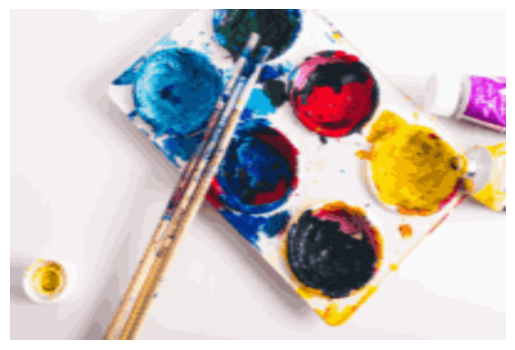

In [ ]:
# Display the image
plt.axis('off')
plt.imshow(img_c)
plt.show()

Refazendo com outra imagem e mudando os parâmetros para 16 cores RGB


<ipython-input-17-dc0a7f9fa140>:16: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imread(filepath)


#6b442e


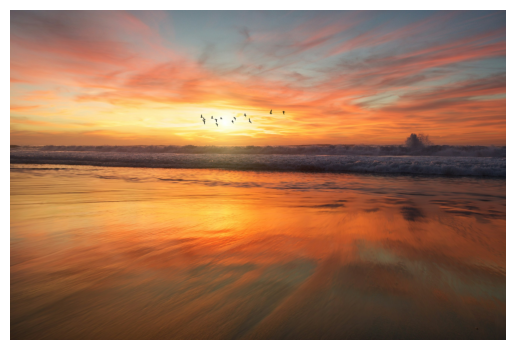

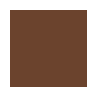

#e5986f


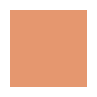

#c58250


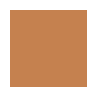

#fce9ad


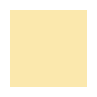

#96908f


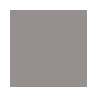

#50382a


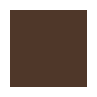

#f5a24c


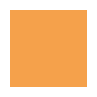

#885134


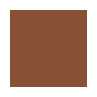

#e17434


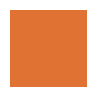

#695d60


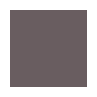

#f7c67c


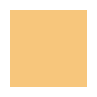

#bb9c8c


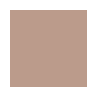

#7a787c


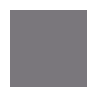

#342926


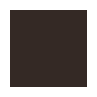

#9a7064


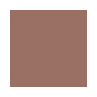

#b15b35


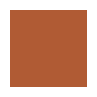

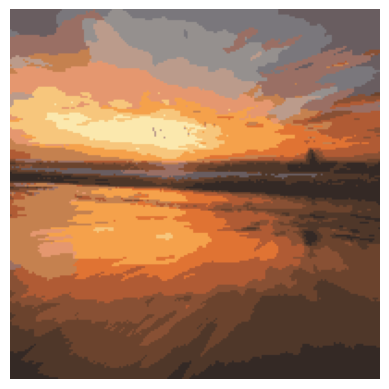

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from imageio import imread
from skimage.transform import resize
from sklearn.cluster import KMeans
from matplotlib.colors import to_hex

# Fix random seed
np.random.seed(0)

# Read image file as 2-D array of RGB values
filepath = 'https://images.unsplash.com/photo-1474524955719-b9f87c50ce47?q=80&w=2672&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D'

img = imread(filepath)

# Show image
plt.axis('off')
plt.imshow(img);

# Resize the image to a 200 by 200 pixel image.
img = resize(img, (200, 200))

# Get each pixel as an array of RGB values.
data = pd.DataFrame(img.reshape(-1, 3),
                    columns=['R', 'G', 'B'])

# Cluster the pixels into 16 colors based on the RGB value.
kmeans = KMeans(n_clusters=16,
                random_state=0)

# Fit and assign clusters
data['Cluster'] = kmeans.fit_predict(data)

# Get the color palette from the cluster centers.
palette = kmeans.cluster_centers_

# Convert data to format accepted by imshow
palette_list = list()
for color in palette:
    palette_list.append([[tuple(color)]])

# Show the color palette, along with the hexadecimal code for the color.
# Show color palette
for color in palette_list:
    print(to_hex(color[0][0]))
    plt.figure(figsize=(1, 1))
    plt.axis('off')
    plt.imshow(color);
    plt.show();

# Recreate the image with using only colors from color palette.
# Replace every pixel's color with the color of its cluster centroid
data['R_cluster'] = data['Cluster'].apply(lambda x: palette_list[x][0][0][0])
data['G_cluster'] = data['Cluster'].apply(lambda x: palette_list[x][0][0][1])
data['B_cluster'] = data['Cluster'].apply(lambda x: palette_list[x][0][0][2])

# Convert the dataframe back to a numpy array
img_c = data[['R_cluster', 'G_cluster', 'B_cluster']].values

# Reshape the data back to a 200x200 image
img_c = img_c.reshape(200, 200, 3)

# Resize the image back to the original aspect ratio
# Adjust resize dimensions based on the new image's aspect ratio
img_c = resize(img_c, (img.shape[0], img.shape[1]))

# Display the image
plt.axis('off')
plt.imshow(img_c)
plt.show()
